In [52]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


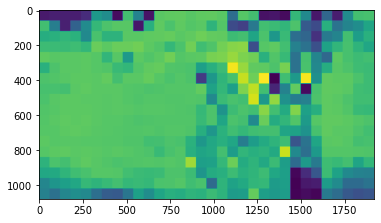

In [53]:
session = "women_tree_schaut_nach_links"
img_name = "0_25_alias_0272_cnn"

READ_PATH = f"D:\\Main\\MA_PROGR\\Data\\Test\\HDR_VDP_CNN_Regr_Session\\{session}"
WRITE_PATH = "D:\\Main\\MA_PROGR\\Data\\Test\\HDR_VDP_CNN_Regr_Session"


# tmp = f"{READ_PATH}\\{img_name}.png"
img = cv2.imread(f"{READ_PATH}\\{img_name}.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img)


In [54]:
BUCKET_SIZE = 60
size_y = img.shape[0]
size_x = img.shape[1]

steps_horizontal = int(size_x/BUCKET_SIZE)
steps_vertikal = int(size_y/BUCKET_SIZE)


In [55]:
alias_values = np.full((steps_vertikal, steps_horizontal), 0).tolist()


In [56]:
def create_tile(bucket_size, vdp_values):
    myArray = np.zeros((BUCKET_SIZE, BUCKET_SIZE))
    for y in range(bucket_size):
        for x in range(bucket_size):
            myArray[y][x] = vdp_values
    return myArray


In [57]:
def create_2D_Matrix_from_HDRVDP_Image(img):
    img_normalized =  img / 255
    for y in range(int(steps_vertikal)):
        for x in range(int(steps_horizontal)):
            bucket = img_normalized[y*BUCKET_SIZE:(y+1)*BUCKET_SIZE, x *
                           BUCKET_SIZE:(x+1)*BUCKET_SIZE]
            # print(np.array(bucket).shape)
            tmp_res = bucket[0][0]
            # return
            alias_values[y][x] = tmp_res
    # np_name = img_name.split(".")[0]
    # np.save(np_name, vdp_values)
    return alias_values


result_2d_matrix = create_2D_Matrix_from_HDRVDP_Image(img)


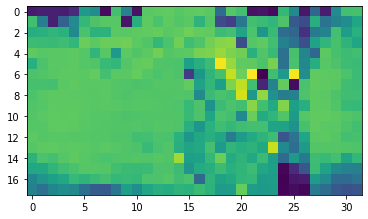

In [58]:
plt.imshow(result_2d_matrix)
plt.show()

In [59]:
np.save(
    f"{WRITE_PATH}\\{img_name.split('.')[0]}_matrix", result_2d_matrix)
